# Nearest neighbor for handwritten digit recognition

In this notebook we will build a classifier that takes an image of a handwritten digit and outputs a label 0-9. We will look at a particularly simple strategy for this problem known as the **nearest neighbor classifier**.

To run this notebook you should have the following Python packages installed:
* `numpy`
* `matplotlib`
* `sklearn`

## 1. The MNIST dataset

`MNIST` is a classic dataset in machine learning, consisting of 28x28 gray-scale images handwritten digits. The original training set contains 60,000 examples and the test set contains 10,000 examples. In this notebook we will be working with a subset of this data: a training set of 7,500 examples and a test set of 1,000 examples.

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import time

## Load the training set
train_data = np.load('MNIST/train_data.npy')
train_labels = np.load('MNIST/train_labels.npy')

## Load the testing set
test_data = np.load('MNIST/test_data.npy')
test_labels = np.load('MNIST/test_labels.npy')


In [5]:
## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

Training dataset dimensions:  (7500, 784)
Number of training labels:  7500
Testing dataset dimensions:  (1000, 784)
Number of testing labels:  1000


In [6]:
## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))
print(train_counts)

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))

Training set distribution:
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
[750 750 750 750 750 750 750 750 750 750]
Test set distribution:
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


## 2. Visualizing the data
Each data point is stored as 784-dimensional vector. To visualize a data point, we first reshape it to a 28x28 image.

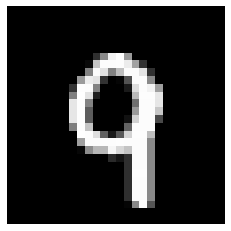

Label 9


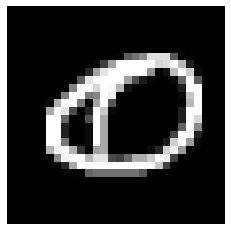

Label 0


In [7]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if(dataset=="train"): 
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        label = test_labels[index]
    print("Label " + str(label))
    return

## View the first data point in the training set
vis_image(0, "train")

## Now view the first data point in the test set
vis_image(0, "test")

## 3. Squared Euclidean distance

To compute nearest neighbors in our data set, we need to first be able to compute distances between data points. A natural distance function is _Euclidean distance_: for two vectors $x, y \in \mathbb{R}^d$, their Euclidean distance is defined as 
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
Often we omit the square root, and simply compute _squared Euclidean distance_:
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$
For the purposes of nearest neighbor computations, the two are equivalent: for three vectors $x, y, z \in \mathbb{R}^d$, we have $\|x - y\| \leq \|x - z\|$ if and only if $\|x - y\|^2 \leq \|x - z\|^2$.

Now we just need to be able to compute squared Euclidean distance. The following function does so.

In [8]:
## Computes squared Euclidean distance between two vectors.
def squared_dist(x,y):
    return np.sum(np.square(x-y))

## Compute distance between a seven and a one in our training set.
print("Distance from 7 to 1: ", squared_dist(train_data[4,],train_data[5,]))

## Compute distance between a seven and a two in our training set.
print("Distance from 7 to 2: ", squared_dist(train_data[4,],train_data[1,]))

## Compute distance between two seven's in our training set.
print("Distance from 7 to 7: ", squared_dist(train_data[4,],train_data[7,]))

Distance from 7 to 1:  5357193.0
Distance from 7 to 2:  12451684.0
Distance from 7 to 7:  5223403.0


## 4. Computing nearest neighbors

Now that we have a distance function defined, we can now turn to nearest neighbor classification. 

In [9]:
## Takes a vector x and returns the index of its nearest neighbor in train_data
def find_NN(x):
    # Compute distances from x to every row in train_data
    distances = [squared_dist(x,train_data[i,]) for i in range(len(train_labels))]
    # Get the index of the smallest distance
    return np.argmin(distances)

## Takes a vector x and returns the class of its nearest neighbor in train_data
def NN_classifier(x):
    # Get the index of the the nearest neighbor
    index = find_NN(x)
    # Return its class
    return train_labels[index]

A success case:
NN classification:  0
True label:  0
The test image:


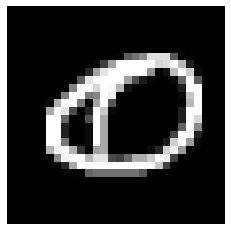

Label 0
The corresponding nearest neighbor image:


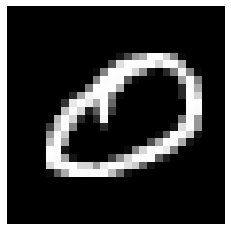

Label 0


In [10]:
## A success case:
print("A success case:")
print("NN classification: ", NN_classifier(test_data[0,]))
print("True label: ", test_labels[0])
print("The test image:")
vis_image(0, "test")
print("The corresponding nearest neighbor image:")
vis_image(find_NN(test_data[0,]), "train")

A failure case:
NN classification:  2
True label:  3
The test image:


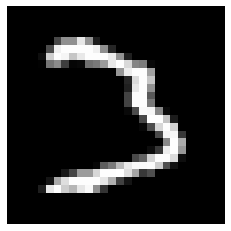

Label 3
The corresponding nearest neighbor image:


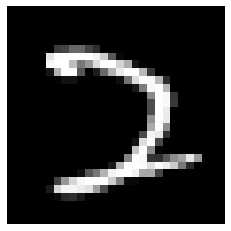

Label 2


In [11]:
## A failure case:
print("A failure case:")
print("NN classification: ", NN_classifier(test_data[39,]))
print("True label: ", test_labels[39])
print("The test image:")
vis_image(39, "test")
print("The corresponding nearest neighbor image:")
vis_image(find_NN(test_data[39,]), "train")

## 5. For you to try
The above two examples show the results of the NN classifier on test points number 0 and 39.

Now try test point number 100.
* What is the index of its nearest neighbor in the training set? _Record the answer: you will enter it as part of this week's assignment._
* Display both the test point and its nearest neighbor.
* What label is predicted? Is this the correct label?

5. For you to try
Index of its nearest neighbor:  4711

Image of the Nearest neighbor


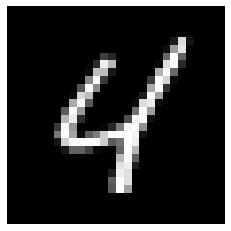

Label 4

Image of the test point


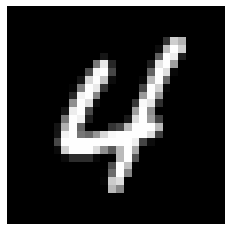

Label 4

The predicted label is:  4
The predicted label is correct


In [12]:
idx = 100
print("5. For you to try")
nn_idx = find_NN(test_data[idx,])
print("Index of its nearest neighbor: ", nn_idx)
print("\nImage of the Nearest neighbor")
vis_image(nn_idx, dataset="train")

print("\nImage of the test point")
vis_image(idx, dataset="test")

print("\nThe predicted label is: ", train_labels[nn_idx])
if train_labels[nn_idx] == test_labels[idx]:
    print ("The predicted label is correct")
else:
    print ("The predicted label is wrong")



## 6. Processing the full test set

Now let's apply our nearest neighbor classifier over the full data set. 

Note that to classify each test point, our code takes a full pass over each of the 7500 training examples. Thus we should not expect testing to be very fast. The following code takes about 100-150 seconds on 2.6 GHz Intel Core i5. 

In [57]:
## Predict on each test data point (and time it!)
t_before = time.time()
test_predictions = [NN_classifier(test_data[i,]) for i in range(len(test_labels))]
t_after = time.time()

## Compute the error
err_positions = np.not_equal(test_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)

print("Error of nearest neighbor classifier: ", error)
print("Classification time (seconds): ", t_after - t_before)

Error of nearest neighbor classifier:  0.046
Classification time (seconds):  54.269932985305786


In [64]:
#My code:
test_prediction = [NN_classifier(test_data[i,]) for i in range(len(test_labels))]

#Error
err_pos = np.not_equal(test_labels, test_prediction)
err = 100 * (float(np.sum(err_pos)) / len(test_labels))

print( "Error of the NN classifier" , err ," %")


Error of the NN classifier 4.6  %


## 7. Faster nearest neighbor methods

Performing nearest neighbor classification in the way we have presented requires a full pass through the training set in order to classify a single point. If there are $N$ training points in $\mathbb{R}^d$, this takes $O(N d)$ time.

Fortunately, there are faster methods to perform nearest neighbor look up if we are willing to spend some time preprocessing the training set. `scikit-learn` has fast implementations of two useful nearest neighbor data structures: the _ball tree_ and the _k-d tree_. 

In [97]:
from sklearn.neighbors import BallTree

## Build nearest neighbor structure on training data
t_before = time.time()
ball_tree = BallTree(train_data)
t_after = time.time()

## Compute training time
t_training = t_after - t_before
print("Time to build data structure (seconds): ", t_training)

## Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))
ball_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

## Verify that the predictions are the same
print("Ball tree produces same predictions as above? ", np.array_equal(test_predictions, ball_tree_predictions))

Time to build data structure (seconds):  0.8077926635742188
Time to classify test set (seconds):  5.04498291015625
Ball tree produces same predictions as above?  True


## 7. Playing with the results
Calculate the error of the k = 1; 3 and 5 - NN
Show the prediction, the test img and test label

In [140]:
from sklearn.neighbors import BallTree
ball_tree = BallTree(train_data, metric='euclidean')
ind_nn = np.squeeze(ball_tree.query(test_data, k=5 ,return_distance = False))


1 nearest:  [2 3 3 3 7] Prediction label:  2 Original label:  3


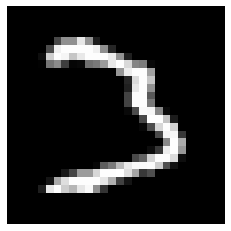

Label 3
1 nearest:  [7 7 7 7 7] Prediction label:  7 Original label:  2


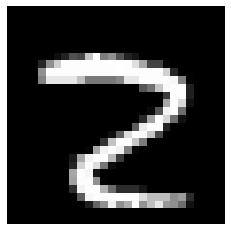

Label 2
1 nearest:  [7 7 7 7 7] Prediction label:  7 Original label:  8


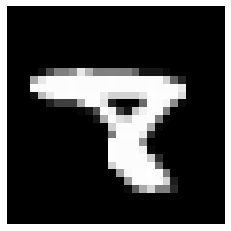

Label 8
1 nearest:  [5 6 6 8 6] Prediction label:  5 Original label:  6


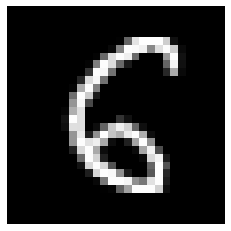

Label 6
1 nearest:  [8 2 2 2 8] Prediction label:  8 Original label:  2


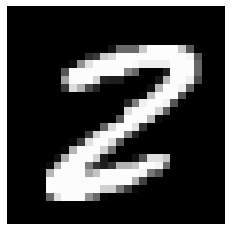

Label 2
1 nearest:  [3 3 8 3 2] Prediction label:  3 Original label:  9


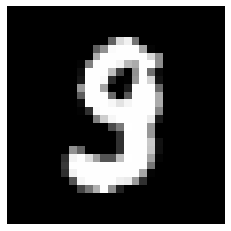

Label 9
1 nearest:  [0 0 5 5 5] Prediction label:  0 Original label:  5


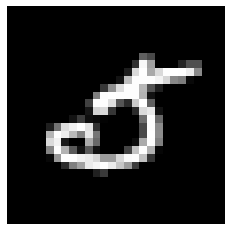

Label 5
1 nearest:  [4 4 4 4 4] Prediction label:  4 Original label:  9


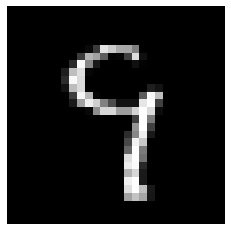

Label 9
1 nearest:  [7 2 2 7 7] Prediction label:  7 Original label:  2


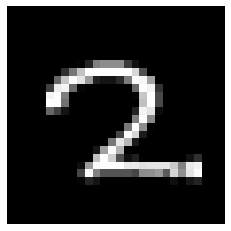

Label 2
1 nearest:  [0 2 3 3 8] Prediction label:  0 Original label:  9


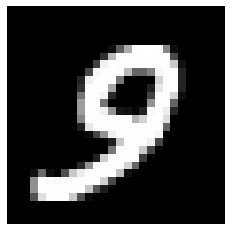

Label 9
1 nearest:  [1 1 1 1 1] Prediction label:  1 Original label:  2


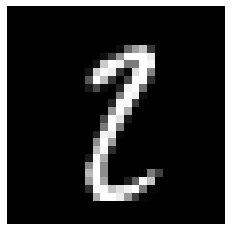

Label 2
1 nearest:  [4 4 4 4 7] Prediction label:  4 Original label:  7


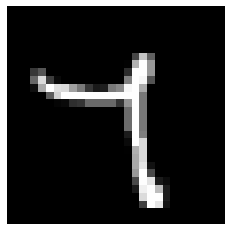

Label 7
1 nearest:  [6 0 8 3 8] Prediction label:  6 Original label:  8


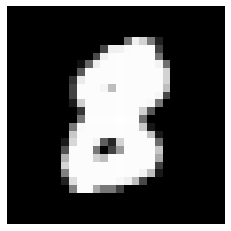

Label 8
1 nearest:  [1 1 1 1 1] Prediction label:  1 Original label:  9


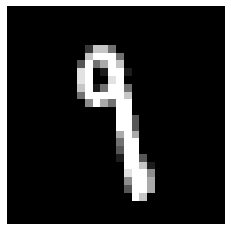

Label 9
1 nearest:  [7 2 2 7 2] Prediction label:  7 Original label:  2


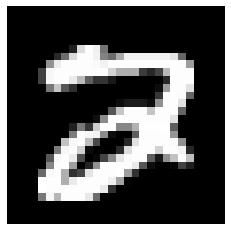

Label 2
1 nearest:  [9 4 4 4 9] Prediction label:  9 Original label:  4


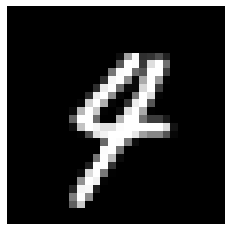

Label 4
1 nearest:  [5 5 3 5 5] Prediction label:  5 Original label:  3


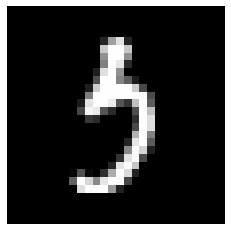

Label 3
1 nearest:  [4 8 3 4 8] Prediction label:  4 Original label:  3


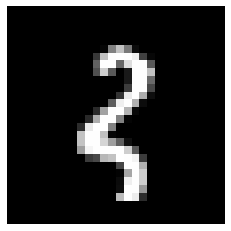

Label 3
1 nearest:  [1 4 2 1 1] Prediction label:  1 Original label:  7


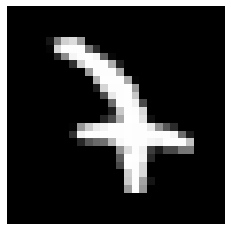

Label 7
1 nearest:  [2 9 7 3 3] Prediction label:  2 Original label:  9


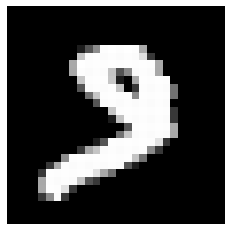

Label 9
1 nearest:  [5 9 5 9 5] Prediction label:  5 Original label:  9


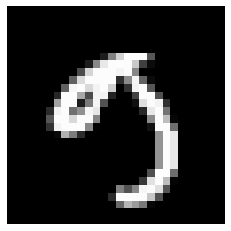

Label 9
1 nearest:  [8 3 3 3 3] Prediction label:  8 Original label:  3


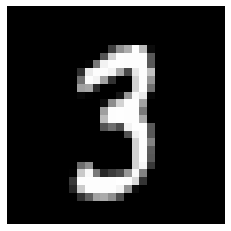

Label 3
1 nearest:  [4 4 4 4 8] Prediction label:  4 Original label:  8


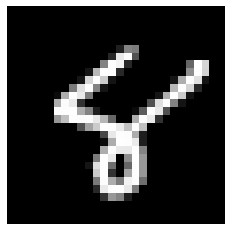

Label 8
1 nearest:  [7 7 1 7 1] Prediction label:  7 Original label:  9


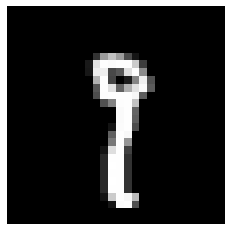

Label 9
1 nearest:  [0 8 0 6 0] Prediction label:  0 Original label:  8


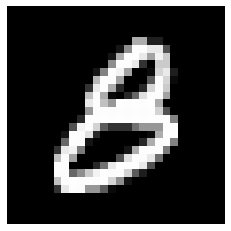

Label 8
1 nearest:  [5 0 0 0 0] Prediction label:  5 Original label:  0


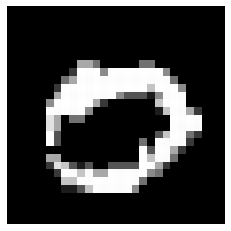

Label 0
1 nearest:  [5 5 3 3 3] Prediction label:  5 Original label:  3


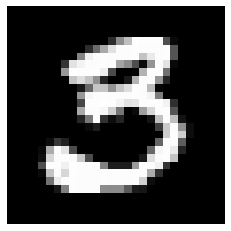

Label 3
1 nearest:  [9 9 9 9 9] Prediction label:  9 Original label:  7


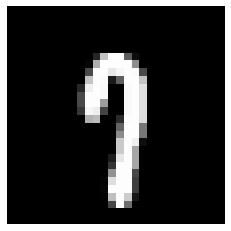

Label 7
1 nearest:  [2 2 7 3 2] Prediction label:  2 Original label:  3


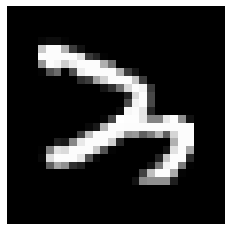

Label 3
1 nearest:  [9 4 4 4 4] Prediction label:  9 Original label:  4


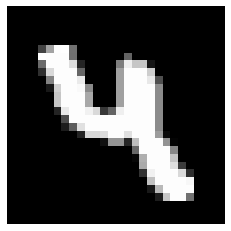

Label 4
1 nearest:  [4 9 9 9 9] Prediction label:  4 Original label:  9


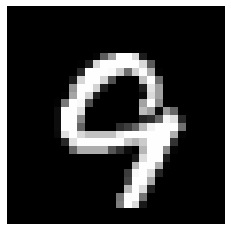

Label 9
1 nearest:  [7 7 9 7 0] Prediction label:  7 Original label:  9


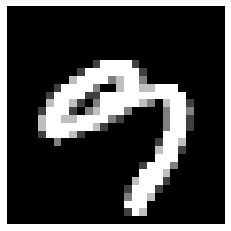

Label 9
1 nearest:  [9 4 4 9 9] Prediction label:  9 Original label:  4


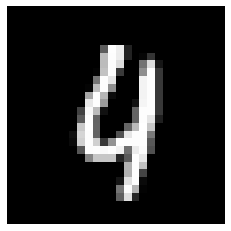

Label 4
1 nearest:  [1 7 7 7 1] Prediction label:  1 Original label:  7


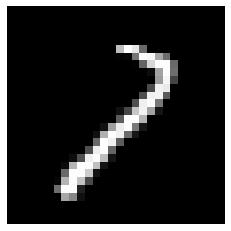

Label 7
1 nearest:  [5 3 3 3 3] Prediction label:  5 Original label:  3


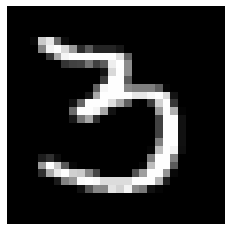

Label 3
1 nearest:  [9 9 9 9 9] Prediction label:  9 Original label:  5


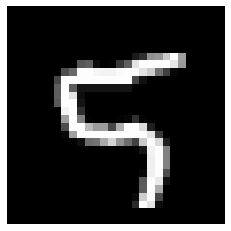

Label 5
1 nearest:  [4 7 9 4 7] Prediction label:  4 Original label:  3


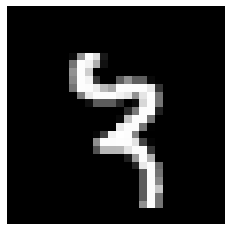

Label 3
1 nearest:  [3 2 2 3 2] Prediction label:  3 Original label:  2


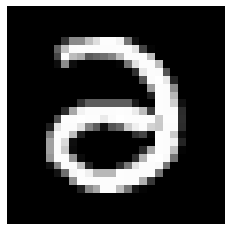

Label 2
1 nearest:  [1 1 1 1 1] Prediction label:  1 Original label:  7


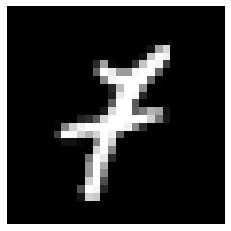

Label 7
1 nearest:  [7 1 1 1 9] Prediction label:  7 Original label:  9


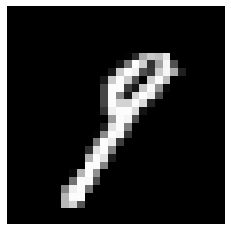

Label 9
1 nearest:  [9 9 8 9 9] Prediction label:  9 Original label:  8


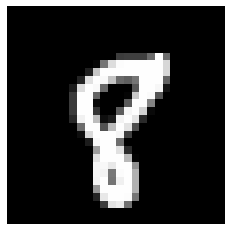

Label 8
1 nearest:  [1 1 7 1 1] Prediction label:  1 Original label:  7


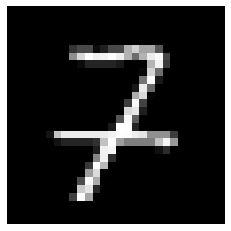

Label 7
1 nearest:  [2 8 3 2 8] Prediction label:  2 Original label:  8


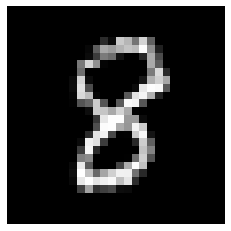

Label 8
1 nearest:  [0 0 0 3 3] Prediction label:  0 Original label:  8


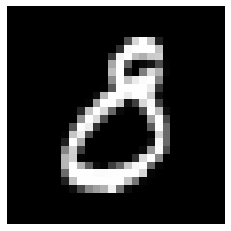

Label 8
1 nearest:  [3 8 3 8 3] Prediction label:  3 Original label:  8


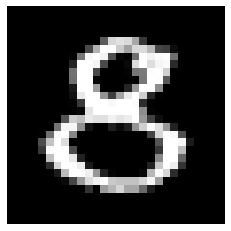

Label 8
1 nearest:  [5 5 8 8 5] Prediction label:  5 Original label:  3


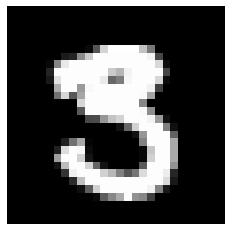

Label 3
Error of the 1-NN classifier 4.6  %
3 nearest:  [7 9 1 9 7] Prediction label:  1 Original label:  7


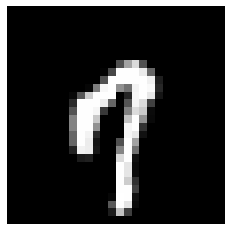

Label 7
3 nearest:  [8 5 9 8 8] Prediction label:  5 Original label:  8


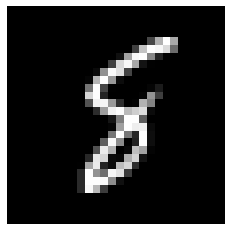

Label 8
3 nearest:  [7 7 7 7 7] Prediction label:  7 Original label:  2


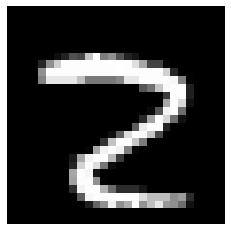

Label 2
3 nearest:  [7 7 7 7 7] Prediction label:  7 Original label:  8


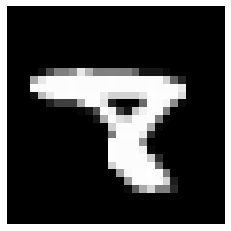

Label 8
3 nearest:  [3 3 8 3 2] Prediction label:  3 Original label:  9


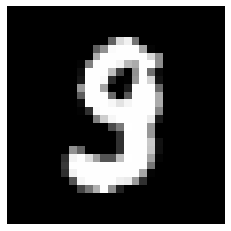

Label 9
3 nearest:  [0 0 5 5 5] Prediction label:  0 Original label:  5


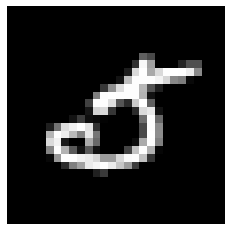

Label 5
3 nearest:  [4 4 4 4 4] Prediction label:  4 Original label:  9


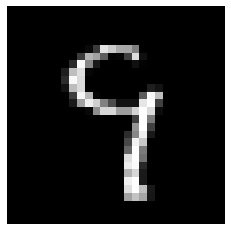

Label 9
3 nearest:  [0 2 3 3 8] Prediction label:  0 Original label:  9


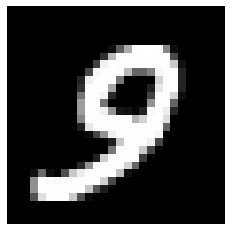

Label 9
3 nearest:  [1 1 1 1 1] Prediction label:  1 Original label:  2


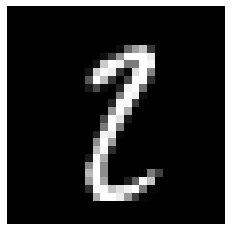

Label 2
3 nearest:  [4 4 4 4 7] Prediction label:  4 Original label:  7


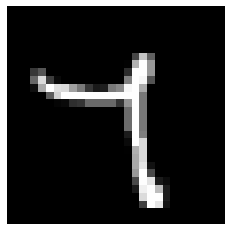

Label 7
3 nearest:  [9 7 7 9 7] Prediction label:  7 Original label:  9


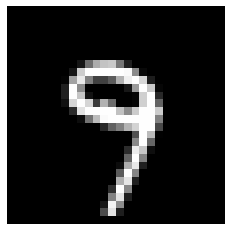

Label 9
3 nearest:  [8 2 3 8 8] Prediction label:  2 Original label:  8


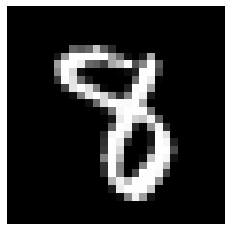

Label 8
3 nearest:  [9 8 3 8 3] Prediction label:  3 Original label:  9


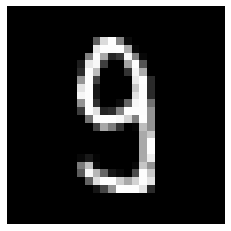

Label 9
3 nearest:  [6 0 8 3 8] Prediction label:  0 Original label:  8


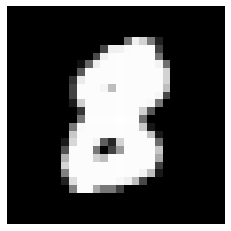

Label 8
3 nearest:  [7 1 1 1 7] Prediction label:  1 Original label:  7


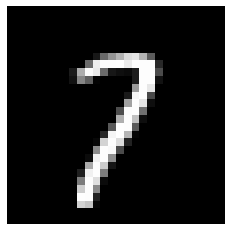

Label 7
3 nearest:  [1 1 1 1 1] Prediction label:  1 Original label:  9


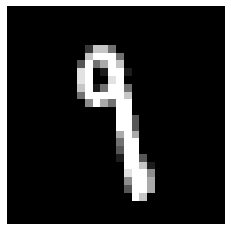

Label 9
3 nearest:  [5 5 3 5 5] Prediction label:  5 Original label:  3


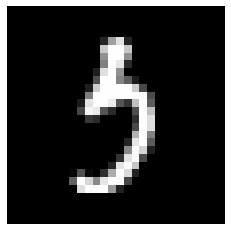

Label 3
3 nearest:  [1 4 2 1 1] Prediction label:  1 Original label:  7


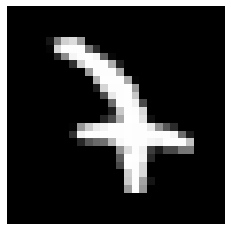

Label 7
3 nearest:  [2 9 7 3 3] Prediction label:  2 Original label:  9


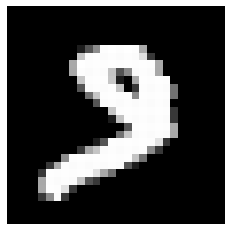

Label 9
3 nearest:  [5 9 5 9 5] Prediction label:  5 Original label:  9


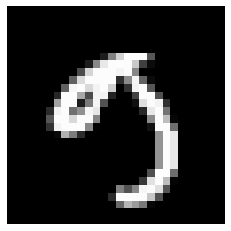

Label 9
3 nearest:  [4 4 4 4 8] Prediction label:  4 Original label:  8


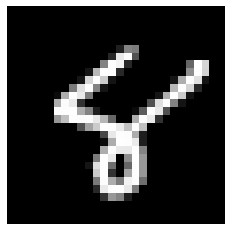

Label 8
3 nearest:  [7 7 1 7 1] Prediction label:  7 Original label:  9


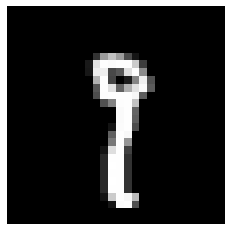

Label 9
3 nearest:  [0 8 0 6 0] Prediction label:  0 Original label:  8


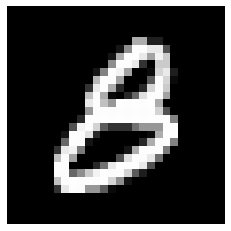

Label 8
3 nearest:  [4 6 6 6 6] Prediction label:  6 Original label:  4


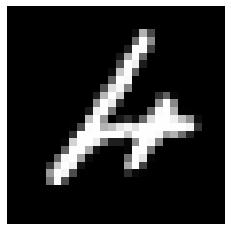

Label 4
3 nearest:  [5 6 6 8 6] Prediction label:  6 Original label:  5


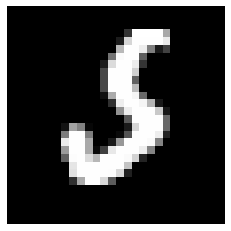

Label 5
3 nearest:  [5 5 3 3 3] Prediction label:  5 Original label:  3


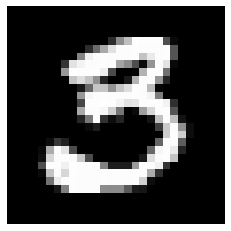

Label 3
3 nearest:  [9 9 9 9 9] Prediction label:  9 Original label:  7


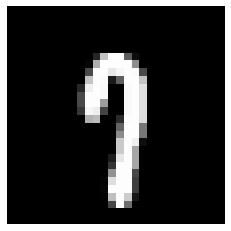

Label 7
3 nearest:  [5 6 6 7 6] Prediction label:  6 Original label:  5


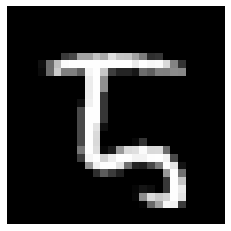

Label 5
3 nearest:  [2 2 7 3 2] Prediction label:  2 Original label:  3


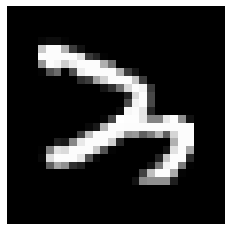

Label 3
3 nearest:  [7 7 9 7 0] Prediction label:  7 Original label:  9


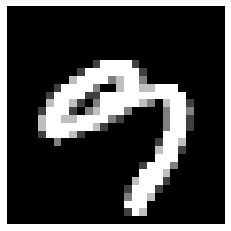

Label 9
3 nearest:  [8 5 5 8 8] Prediction label:  5 Original label:  8


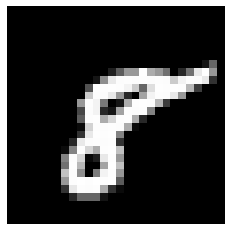

Label 8
3 nearest:  [9 9 9 9 9] Prediction label:  9 Original label:  5


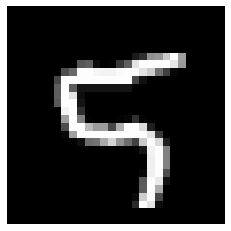

Label 5
3 nearest:  [4 7 9 4 7] Prediction label:  4 Original label:  3


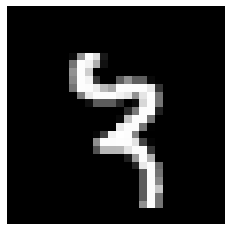

Label 3
3 nearest:  [6 0 0 6 6] Prediction label:  0 Original label:  6


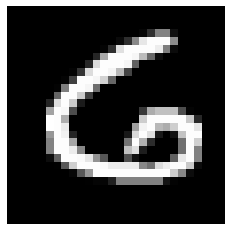

Label 6
3 nearest:  [8 4 9 8 8] Prediction label:  4 Original label:  8


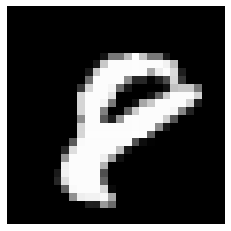

Label 8
3 nearest:  [3 8 2 3 3] Prediction label:  2 Original label:  3


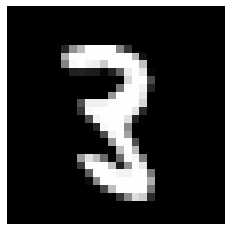

Label 3
3 nearest:  [7 9 9 7 9] Prediction label:  9 Original label:  7


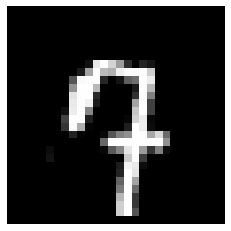

Label 7
3 nearest:  [1 1 1 1 1] Prediction label:  1 Original label:  7


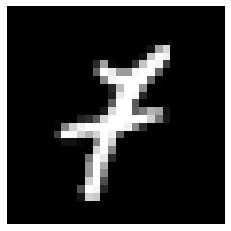

Label 7
3 nearest:  [7 1 1 1 9] Prediction label:  1 Original label:  9


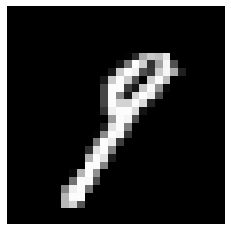

Label 9
3 nearest:  [4 9 1 1 4] Prediction label:  1 Original label:  4


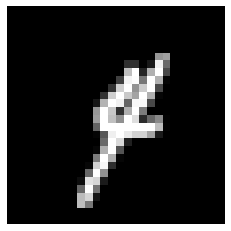

Label 4
3 nearest:  [4 9 9 9 9] Prediction label:  9 Original label:  4


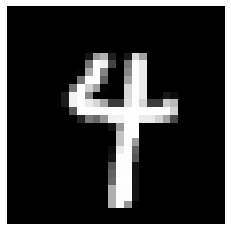

Label 4
3 nearest:  [8 5 3 8 8] Prediction label:  3 Original label:  8


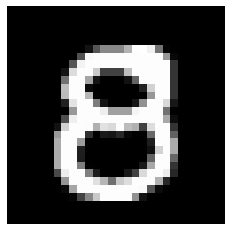

Label 8
3 nearest:  [9 4 4 4 9] Prediction label:  4 Original label:  9


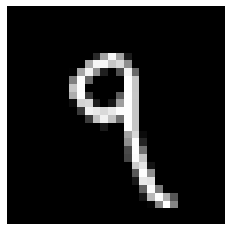

Label 9
3 nearest:  [9 9 8 9 9] Prediction label:  9 Original label:  8


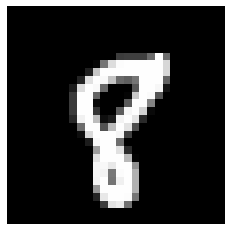

Label 8
3 nearest:  [1 1 7 1 1] Prediction label:  1 Original label:  7


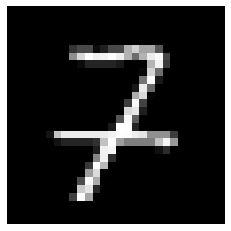

Label 7
3 nearest:  [2 8 3 2 8] Prediction label:  2 Original label:  8


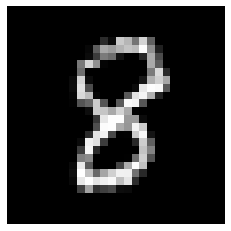

Label 8
3 nearest:  [7 1 1 1 7] Prediction label:  1 Original label:  7


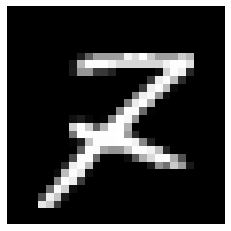

Label 7
3 nearest:  [8 5 0 5 8] Prediction label:  0 Original label:  8


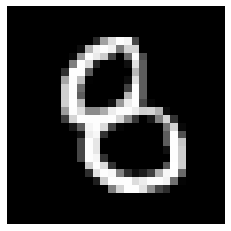

Label 8
3 nearest:  [0 0 0 3 3] Prediction label:  0 Original label:  8


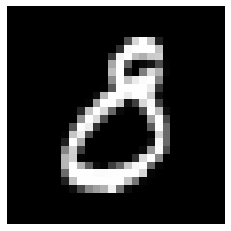

Label 8
3 nearest:  [3 8 3 8 3] Prediction label:  3 Original label:  8


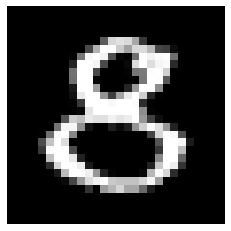

Label 8
3 nearest:  [5 5 8 8 5] Prediction label:  5 Original label:  3


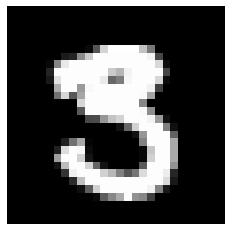

Label 3
3 nearest:  [8 4 4 4 9] Prediction label:  4 Original label:  8


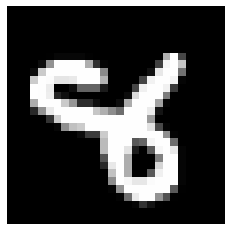

Label 8
Error of the 3-NN classifier 5.2  %
5 nearest:  [7 7 7 7 7] Prediction label:  7 Original label:  2


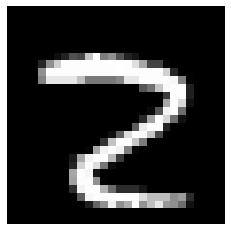

Label 2
5 nearest:  [7 7 7 7 7] Prediction label:  7 Original label:  8


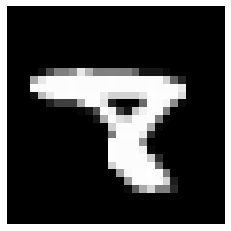

Label 8
5 nearest:  [4 9 4 9 9] Prediction label:  9 Original label:  4


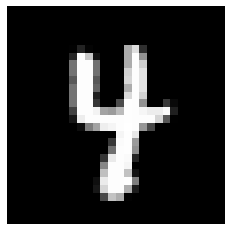

Label 4
5 nearest:  [3 3 8 3 2] Prediction label:  3 Original label:  9


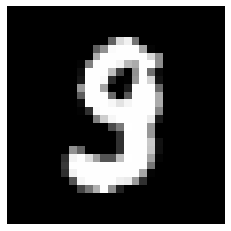

Label 9
5 nearest:  [4 4 4 4 4] Prediction label:  4 Original label:  9


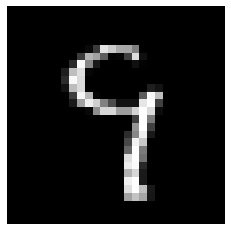

Label 9
5 nearest:  [7 2 2 7 7] Prediction label:  7 Original label:  2


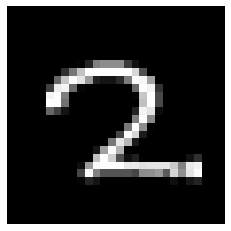

Label 2
5 nearest:  [0 2 3 3 8] Prediction label:  3 Original label:  9


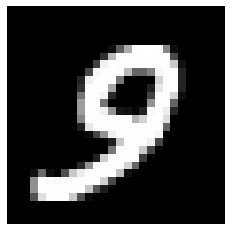

Label 9
5 nearest:  [1 1 1 1 1] Prediction label:  1 Original label:  2


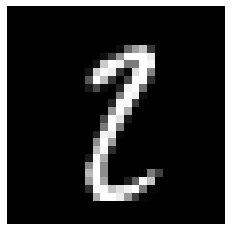

Label 2
5 nearest:  [4 4 4 4 7] Prediction label:  4 Original label:  7


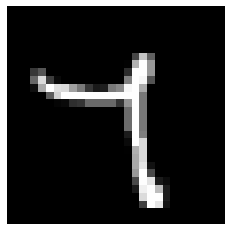

Label 7
5 nearest:  [9 7 7 9 7] Prediction label:  7 Original label:  9


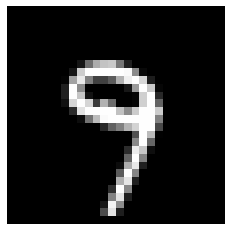

Label 9
5 nearest:  [9 8 3 8 3] Prediction label:  3 Original label:  9


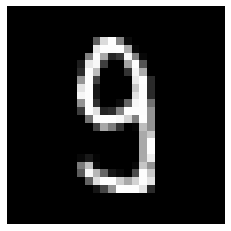

Label 9
5 nearest:  [6 6 5 5 0] Prediction label:  5 Original label:  6


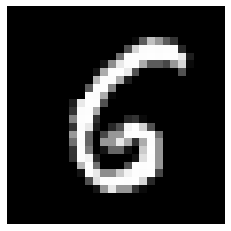

Label 6
5 nearest:  [7 1 1 1 7] Prediction label:  1 Original label:  7


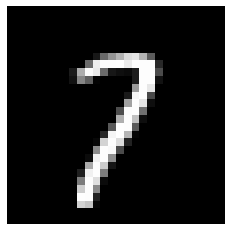

Label 7
5 nearest:  [1 1 1 1 1] Prediction label:  1 Original label:  9


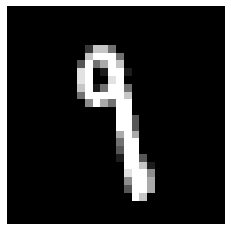

Label 9
5 nearest:  [5 5 3 5 5] Prediction label:  5 Original label:  3


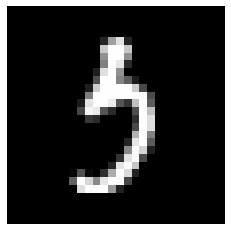

Label 3
5 nearest:  [4 8 3 4 8] Prediction label:  4 Original label:  3


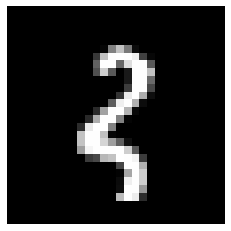

Label 3
5 nearest:  [1 4 2 1 1] Prediction label:  1 Original label:  7


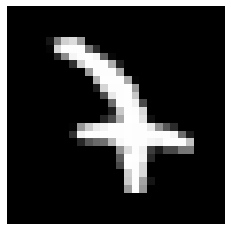

Label 7
5 nearest:  [2 9 7 3 3] Prediction label:  3 Original label:  9


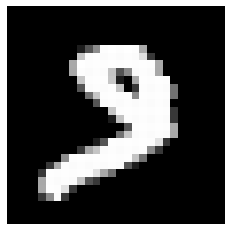

Label 9
5 nearest:  [5 9 5 9 5] Prediction label:  5 Original label:  9


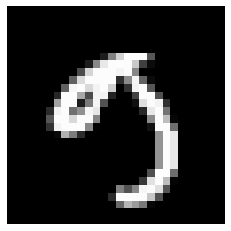

Label 9
5 nearest:  [6 6 1 1 1] Prediction label:  1 Original label:  6


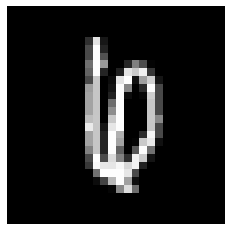

Label 6
5 nearest:  [4 4 4 4 8] Prediction label:  4 Original label:  8


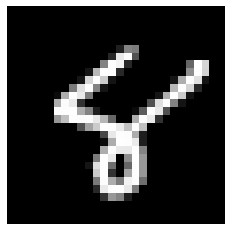

Label 8
5 nearest:  [7 7 1 7 1] Prediction label:  7 Original label:  9


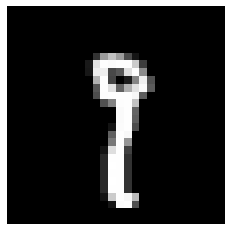

Label 9
5 nearest:  [0 8 0 6 0] Prediction label:  0 Original label:  8


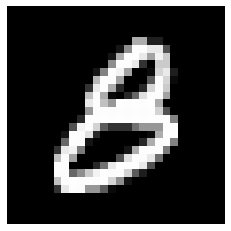

Label 8
5 nearest:  [4 6 6 6 6] Prediction label:  6 Original label:  4


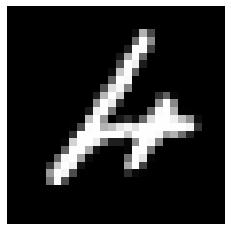

Label 4
5 nearest:  [5 6 6 8 6] Prediction label:  6 Original label:  5


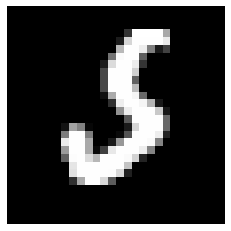

Label 5
5 nearest:  [9 9 9 9 9] Prediction label:  9 Original label:  7


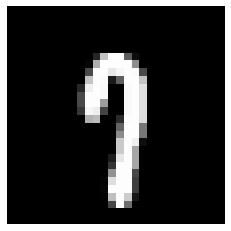

Label 7
5 nearest:  [5 6 6 7 6] Prediction label:  6 Original label:  5


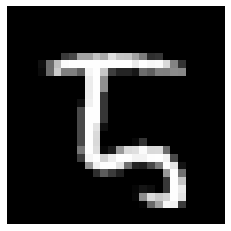

Label 5
5 nearest:  [2 2 7 3 2] Prediction label:  2 Original label:  3


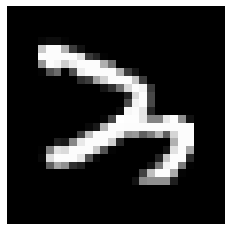

Label 3
5 nearest:  [7 7 9 7 0] Prediction label:  7 Original label:  9


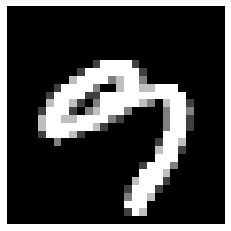

Label 9
5 nearest:  [2 2 1 1 1] Prediction label:  1 Original label:  2


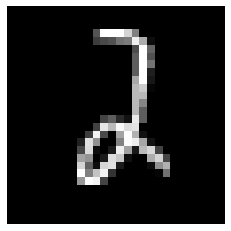

Label 2
5 nearest:  [9 4 4 9 9] Prediction label:  9 Original label:  4


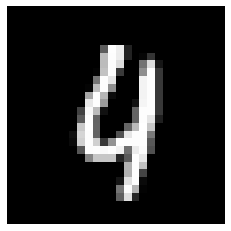

Label 4
5 nearest:  [9 9 9 9 9] Prediction label:  9 Original label:  5


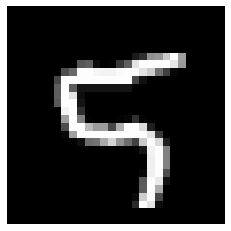

Label 5
5 nearest:  [4 7 9 4 7] Prediction label:  4 Original label:  3


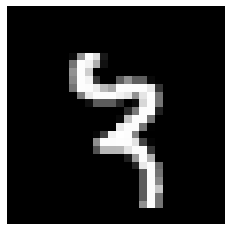

Label 3
5 nearest:  [7 9 9 7 9] Prediction label:  9 Original label:  7


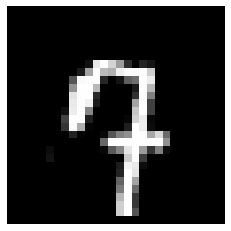

Label 7
5 nearest:  [1 1 1 1 1] Prediction label:  1 Original label:  7


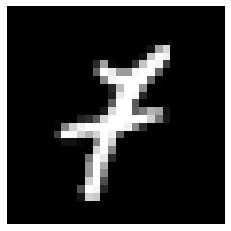

Label 7
5 nearest:  [7 1 1 1 9] Prediction label:  1 Original label:  9


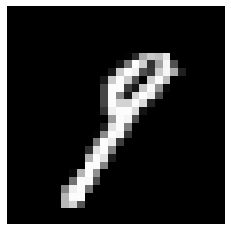

Label 9
5 nearest:  [4 9 1 1 4] Prediction label:  1 Original label:  4


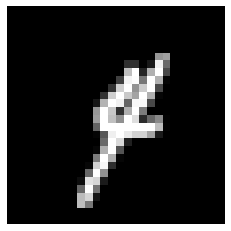

Label 4
5 nearest:  [7 4 7 4 4] Prediction label:  4 Original label:  7


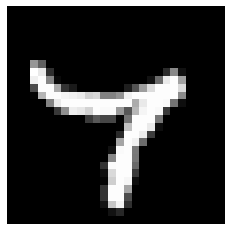

Label 7
5 nearest:  [4 9 9 9 9] Prediction label:  9 Original label:  4


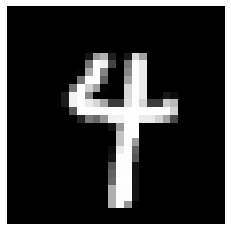

Label 4
5 nearest:  [9 4 4 4 9] Prediction label:  4 Original label:  9


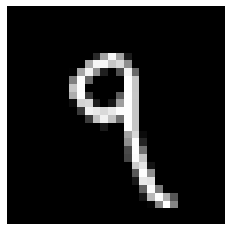

Label 9
5 nearest:  [9 9 8 9 9] Prediction label:  9 Original label:  8


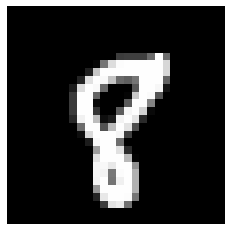

Label 8
5 nearest:  [1 1 7 1 1] Prediction label:  1 Original label:  7


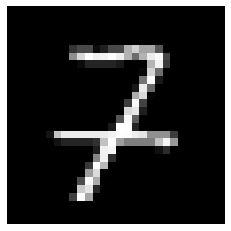

Label 7
5 nearest:  [2 8 3 2 8] Prediction label:  2 Original label:  8


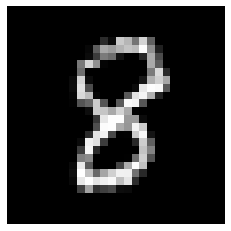

Label 8
5 nearest:  [7 1 1 1 7] Prediction label:  1 Original label:  7


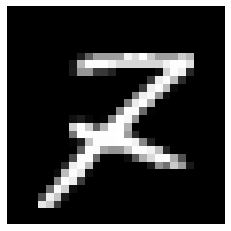

Label 7
5 nearest:  [8 5 0 5 8] Prediction label:  5 Original label:  8


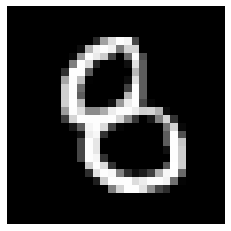

Label 8
5 nearest:  [0 0 0 3 3] Prediction label:  0 Original label:  8


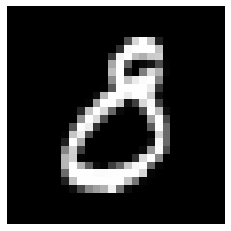

Label 8
5 nearest:  [3 8 3 8 3] Prediction label:  3 Original label:  8


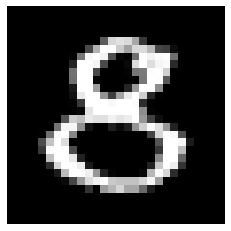

Label 8
5 nearest:  [5 5 8 8 5] Prediction label:  5 Original label:  3


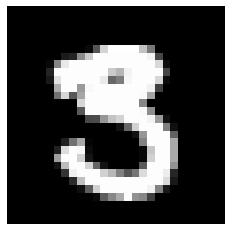

Label 3
5 nearest:  [8 4 4 4 9] Prediction label:  4 Original label:  8


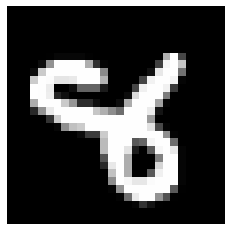

Label 8
Error of the 5-NN classifier 4.9  %


In [160]:

prediction_labels = train_labels[ind_nn]
#print(prediction_labels[0,:])
#prediction_labels.shape
prediction_5NN = np.array([np.argmax(np.bincount(prediction_labels[i,:])) for i in range(len(prediction_labels[:,0]))])
prediction_3NN = np.array([np.argmax(np.bincount(prediction_labels[i,0:3])) for i in range(len(prediction_labels[:,0]))])
prediction_1NN = prediction_labels[:,0]

print("================================================================================")
print("================================================================================")
print("================================================================================")

## Compute the error
#Error of 1-NN
err_pos = np.not_equal(prediction_1NN, test_labels)
err = 100 * (float(np.sum(err_pos)) / len(test_labels))

for i in range(len(test_labels)):
    if err_pos[i]:
        print("1 nearest: ",prediction_labels[i], "Prediction label: ", prediction_1NN[i] ,"Original label: ", test_labels[i])
        vis_image(i, dataset="test")

print( "Error of the 1-NN classifier" , err ," %")

print("================================================================================")
print("================================================================================")
print("================================================================================")

#Error of 3-NN
err_pos = np.not_equal(prediction_3NN, test_labels)
err = 100 * (float(np.sum(err_pos)) / len(test_labels))

for i in range(len(test_labels)):
    if err_pos[i]:
        print("3 nearest: ",prediction_labels[i], "Prediction label: ", prediction_3NN[i] ,"Original label: ", test_labels[i])
        vis_image(i, dataset="test")

print( "Error of the 3-NN classifier" , err ," %")

print("================================================================================")
print("================================================================================")
print("================================================================================")

#Error of 5-NN
err_pos = np.not_equal(prediction_5NN, test_labels)
err = 100 * (float(np.sum(err_pos)) / len(test_labels))

for i in range(len(test_labels)):
    if err_pos[i]:
        print("5 nearest: ",prediction_labels[i], "Prediction label: ", prediction_5NN[i] ,"Original label: ", test_labels[i])
        vis_image(i, dataset="test")

print( "Error of the 5-NN classifier" , err ," %")

print("================================================================================")


In [11]:
from sklearn.neighbors import KDTree

## Build nearest neighbor structure on training data
t_before = time.time()
kd_tree = KDTree(train_data)
t_after = time.time()

## Compute training time
t_training = t_after - t_before
print("Time to build data structure (seconds): ", t_training)

## Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(kd_tree.query(test_data, k=1, return_distance=False))
kd_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

## Verify that the predictions are the same
print("KD tree produces same predictions as above? ", np.array_equal(test_predictions, kd_tree_predictions))

('Time to build data structure (seconds): ', 0.6729860305786133)
('Time to classify test set (seconds): ', 12.384800910949707)
('KD tree produces same predictions as above? ', True)
